# Étape 2 : Préparation et Fusion des Données

## Objectif
Créer un dataset unique contenant les données vélo + météo (température + pluie) prêt pour le Machine Learning.

## Plan
1. Charger les 3 datasets
2. Nettoyer les formats (virgules → points, dates → datetime)
3. Agréger les données météo par heure
4. Fusionner les datasets avec LEFT JOIN
5. Remplir les valeurs manquantes (pluie = 0 si absent)
6. Sauvegarder le dataset final

---

## 2.1 Import et Chargement

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuration graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

print("Bibliothèques importées!")

Bibliothèques importées!


In [3]:
# Chargement des 3 datasets
print("Chargement des datasets...\n")

df_velo = pd.read_csv('../CSVs/counting_data_april_2022.csv', sep=';')
print(f"Vélo : {df_velo.shape[0]:,} lignes x {df_velo.shape[1]} colonnes")

df_temp = pd.read_csv('../CSVs/temperature_converted.csv', sep=';')
print(f"Température : {df_temp.shape[0]:,} lignes x {df_temp.shape[1]} colonnes")

df_pluie = pd.read_csv('../CSVs/eau_converted.csv', sep=';')
print(f"Pluie : {df_pluie.shape[0]:,} lignes x {df_pluie.shape[1]} colonnes")

Chargement des datasets...

Vélo : 262,872 lignes x 5 colonnes
Température : 26,618 lignes x 3 colonnes
Pluie : 5,866 lignes x 3 colonnes


---
## 2.2 Nettoyage des Formats

### Problème identifié :
- Température et Pluie sont en format **texte avec virgule** (ex: `"14,75"`)
- Les dates sont en format **string** au lieu de datetime

### Solution :
1. Remplacer `,` par `.` 
2. Convertir en float
3. Convertir les dates en datetime

### 2.2.1 Nettoyage Température

In [5]:
print("Nettoyage des données température...\n")

# Avant nettoyage
print("AVANT :")
print(f"Type de degre_celsius : {df_temp['degre_celsius'].dtype}")
print(f"Exemple : {df_temp['degre_celsius'].head(3).tolist()}")

# Conversion : remplacer virgule par point, puis convertir en float
df_temp['temperature'] = df_temp['degre_celsius'].str.replace(',', '.').astype(float)

# Convertir la date en datetime
df_temp['timestamp'] = pd.to_datetime(df_temp['horodate'])

# Après nettoyage
print("\nAPRÈS :")
print(f"Type de temperature : {df_temp['temperature'].dtype}")
print(f"Exemple : {df_temp['temperature'].head(3).tolist()}")

print("\nTempérature nettoyée!")
df_temp[['timestamp', 'temperature', 'deveui']].head()

Nettoyage des données température...

AVANT :
Type de degre_celsius : object
Exemple : ['14,75', '14', '13,625']

APRÈS :
Type de temperature : float64
Exemple : [14.75, 14.0, 13.625]

Température nettoyée!


,timestamp,temperature,deveui
0,2022-04-29 23:59:00+02:00,14.7500,70b3d580a0100605
1,2022-04-29 23:58:00+02:00,14.0000,70b3d580a0100647
2,2022-04-29 23:56:00+02:00,13.6250,70b3d580a0100648
3,2022-04-29 23:52:00+02:00,13.5625,70b3d580a0100623
4,2022-04-29 23:51:00+02:00,15.2500,70b3d580a0100654


### 2.2.2 Nettoyage Pluie

In [8]:
print("Nettoyage des données pluviométrie...\n")

# Avant nettoyage
print("AVANT :")
print(f"Type de pluie_mm : {df_pluie['pluie_mm'].dtype}")
print(f"Exemple : {df_pluie['pluie_mm'].head(3).tolist()}")

# Conversion : remplacer virgule par point, puis convertir en float
df_pluie['precipitation'] = df_pluie['pluie_mm'].str.replace(',', '.').astype(float)

# Convertir la date en datetime
df_pluie['timestamp'] = pd.to_datetime(df_pluie['horodate'])

# Après nettoyage
print("\nAPRÈS :")
print(f"Type de precipitation : {df_pluie['precipitation'].dtype}")
print(f"Exemple : {df_pluie['precipitation'].head(3).tolist()}")

print("\nPluviométrie nettoyée!")
df_pluie[['timestamp', 'precipitation', 'identifiant']].head()

Nettoyage des données pluviométrie...

AVANT :
Type de pluie_mm : object
Exemple : ['0,1', '0,1', '0,1']

APRÈS :
Type de precipitation : float64
Exemple : [0.1, 0.1, 0.1]

Pluviométrie nettoyée!


,timestamp,precipitation,identifiant
0,2022-04-29 19:42:00+02:00,0.1,1
1,2022-04-29 19:36:00+02:00,0.1,1
2,2022-04-26 00:24:00+02:00,0.1,1
3,2022-04-26 00:12:00+02:00,0.1,1
4,2022-04-26 00:06:00+02:00,0.1,1


### 2.2.3 Nettoyage Vélo

In [9]:
print("Nettoyage des données vélo...\n")

# Convertir les dates en datetime
df_velo['start_datetime'] = pd.to_datetime(df_velo['start_datetime'])
df_velo['end_datetime'] = pd.to_datetime(df_velo['end_datetime'])

# On va utiliser start_datetime comme timestamp de référence
df_velo['timestamp'] = df_velo['start_datetime']

print("Dates vélo converties!")
print(f"Type de timestamp : {df_velo['timestamp'].dtype}")
df_velo[['timestamp', 'channel_id', 'count']].head()

Nettoyage des données vélo...

Dates vélo converties!
Type de timestamp : datetime64[ns, UTC+02:00]


,timestamp,channel_id,count
0,2022-04-07 01:00:00+02:00,102017788,0
1,2022-04-07 00:00:00+02:00,102017788,0
2,2022-04-06 23:00:00+02:00,102017788,0
3,2022-04-06 22:00:00+02:00,102017788,0
4,2022-04-06 21:00:00+02:00,102017788,0


---
## 2.3 Agrégation des Données Météo

### Problème :
- **Température** : 17 capteurs différents → plusieurs valeurs par heure
- **Pluie** : 37 capteurs différents → plusieurs valeurs par heure
- **Vélo** : Données déjà agrégées par heure et par site

### Solution :
- **Température** → Calculer la **moyenne** par heure (pour avoir une température globale Lyon)
- **Pluie** → Calculer la **moyenne** par heure (pour avoir une pluviométrie globale Lyon)

### 2.3.1 Agrégation Température par Heure

In [10]:
print("Agrégation température par heure...\n")

# Arrondir le timestamp à l'heure (enlever les minutes/secondes)
df_temp['timestamp_hour'] = df_temp['timestamp'].dt.floor('H')

# Avant agrégation
print(f"AVANT agrégation : {len(df_temp):,} lignes (multiples capteurs)")
print(f"Nombre de capteurs : {df_temp['deveui'].nunique()}")

# Calculer la moyenne des températures par heure
df_temp_agg = df_temp.groupby('timestamp_hour').agg({
    'temperature': 'mean',  # Moyenne des températures
}).reset_index()

# Renommer la colonne
df_temp_agg.rename(columns={'timestamp_hour': 'timestamp'}, inplace=True)

# Après agrégation
print(f"\nAPRÈS agrégation : {len(df_temp_agg):,} lignes (1 valeur par heure)")
print(f"Plage de dates : {df_temp_agg['timestamp'].min()} → {df_temp_agg['timestamp'].max()}")

print("\nTempérature agrégée par heure!")
df_temp_agg.head(10)

Agrégation température par heure...

AVANT agrégation : 26,618 lignes (multiples capteurs)
Nombre de capteurs : 17

APRÈS agrégation : 696 lignes (1 valeur par heure)
Plage de dates : 2022-04-01 00:00:00+02:00 → 2022-04-29 23:00:00+02:00

Température agrégée par heure!


C:\Users\stans\AppData\Local\Temp\ipykernel_7440\1547249892.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_temp['timestamp_hour'] = df_temp['timestamp'].dt.floor('H')


,timestamp,temperature
0,2022-04-01 00:00:00+02:00,7.398026
1,2022-04-01 01:00:00+02:00,6.958333
2,2022-04-01 02:00:00+02:00,6.493590
3,2022-04-01 03:00:00+02:00,4.508224
4,2022-04-01 04:00:00+02:00,2.695724
5,2022-04-01 05:00:00+02:00,2.106250
6,2022-04-01 06:00:00+02:00,1.548077
7,2022-04-01 07:00:00+02:00,1.365809
8,2022-04-01 08:00:00+02:00,1.513514
9,2022-04-01 09:00:00+02:00,1.859797


### 2.3.2 Agrégation Pluie par Heure

In [11]:
print("Agrégation pluviométrie par heure...\n")

# Arrondir le timestamp à l'heure
df_pluie['timestamp_hour'] = df_pluie['timestamp'].dt.floor('H')

# Avant agrégation
print(f"AVANT agrégation : {len(df_pluie):,} lignes (multiples capteurs)")
print(f"Nombre de capteurs : {df_pluie['identifiant'].nunique()}")

# Calculer la MOYENNE des précipitations par heure
# (on prend la moyenne car différents capteurs peuvent donner des valeurs différentes)
df_pluie_agg = df_pluie.groupby('timestamp_hour').agg({
    'precipitation': 'mean',  # Moyenne des précipitations
}).reset_index()

# Renommer la colonne
df_pluie_agg.rename(columns={'timestamp_hour': 'timestamp'}, inplace=True)

# Après agrégation
print(f"\nAPRÈS agrégation : {len(df_pluie_agg):,} lignes (1 valeur par heure de pluie)")
print(f"Plage de dates : {df_pluie_agg['timestamp'].min()} → {df_pluie_agg['timestamp'].max()}")

print("\nRAPPEL : Ce dataset ne contient QUE les heures où il a plu!")
print("→ Les heures sans pluie seront ajoutées à 0mm lors de la fusion.")

print("\nPluviométrie agrégée par heure!")
df_pluie_agg.head(10)

Agrégation pluviométrie par heure...

AVANT agrégation : 5,866 lignes (multiples capteurs)
Nombre de capteurs : 31

APRÈS agrégation : 116 lignes (1 valeur par heure de pluie)
Plage de dates : 2022-04-01 00:00:00+02:00 → 2022-04-29 20:00:00+02:00

RAPPEL : Ce dataset ne contient QUE les heures où il a plu!
→ Les heures sans pluie seront ajoutées à 0mm lors de la fusion.

Pluviométrie agrégée par heure!


C:\Users\stans\AppData\Local\Temp\ipykernel_7440\3763271757.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_pluie['timestamp_hour'] = df_pluie['timestamp'].dt.floor('H')


,timestamp,precipitation
0,2022-04-01 00:00:00+02:00,0.100000
1,2022-04-01 02:00:00+02:00,0.100000
2,2022-04-01 03:00:00+02:00,0.182524
3,2022-04-01 04:00:00+02:00,0.171495
4,2022-04-01 05:00:00+02:00,0.155000
5,2022-04-01 06:00:00+02:00,0.160339
6,2022-04-01 07:00:00+02:00,0.140084
7,2022-04-01 08:00:00+02:00,0.125185
8,2022-04-01 09:00:00+02:00,0.100000
9,2022-04-01 10:00:00+02:00,0.179310


### 2.3.3 Agrégation Vélo par Heure

**Stratégie :** Les données vélo sont par site (channel_id). On va **sommer tous les vélos** de tous les sites pour avoir un **total vélo Lyon par heure**.

In [12]:
print("Agrégation vélo par heure (somme de tous les sites)...\n")

# Arrondir à l'heure
df_velo['timestamp_hour'] = df_velo['timestamp'].dt.floor('H')

# Avant agrégation
print(f"AVANT agrégation : {len(df_velo):,} lignes (multiples sites)")
print(f"Nombre de sites différents : {df_velo['channel_id'].nunique()}")

# Sommer tous les vélos par heure (tous sites confondus)
df_velo_agg = df_velo.groupby('timestamp_hour').agg({
    'count': 'sum',  # Somme des vélos de TOUS les sites
}).reset_index()

# Renommer les colonnes
df_velo_agg.rename(columns={'timestamp_hour': 'timestamp', 'count': 'nb_velos'}, inplace=True)

# Après agrégation
print(f"\nAPRÈS agrégation : {len(df_velo_agg):,} lignes (1 total par heure)")
print(f"Plage de dates : {df_velo_agg['timestamp'].min()} → {df_velo_agg['timestamp'].max()}")

print("\nVélos agrégés par heure!")
df_velo_agg.head(10)

Agrégation vélo par heure (somme de tous les sites)...

AVANT agrégation : 262,872 lignes (multiples sites)
Nombre de sites différents : 376

APRÈS agrégation : 696 lignes (1 total par heure)
Plage de dates : 2022-04-01 00:00:00+02:00 → 2022-04-29 23:00:00+02:00

Vélos agrégés par heure!


C:\Users\stans\AppData\Local\Temp\ipykernel_7440\2157171362.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_velo['timestamp_hour'] = df_velo['timestamp'].dt.floor('H')


,timestamp,nb_velos
0,2022-04-01 00:00:00+02:00,3607
1,2022-04-01 01:00:00+02:00,1762
2,2022-04-01 02:00:00+02:00,1207
3,2022-04-01 03:00:00+02:00,878
4,2022-04-01 04:00:00+02:00,652
5,2022-04-01 05:00:00+02:00,885
6,2022-04-01 06:00:00+02:00,2315
7,2022-04-01 07:00:00+02:00,9696
8,2022-04-01 08:00:00+02:00,21176
9,2022-04-01 09:00:00+02:00,11340


In [14]:
# Statistiques sur les vélos agrégés
print("Statistiques du trafic vélo total Lyon par heure :")
print("="*80)
print(df_velo_agg['nb_velos'].describe())

print(f"\nHeure la plus chargée : {df_velo_agg['nb_velos'].max():,} vélos")
print(f"Heure la moins chargée : {df_velo_agg['nb_velos'].min():,} vélos")
print(f"Moyenne : {df_velo_agg['nb_velos'].mean():.0f} vélos/heure")

Statistiques du trafic vélo total Lyon par heure :
count      696.000000
mean     10072.785920
std       9024.364654
min        225.000000
25%       2667.000000
50%       8552.000000
75%      13954.500000
max      44073.000000
Name: nb_velos, dtype: float64

Heure la plus chargée : 44,073 vélos
Heure la moins chargée : 225 vélos
Moyenne : 10073 vélos/heure


---
## 2.4 Fusion des Datasets

### Stratégie de Fusion :

```
1. df_velo (base) ← LEFT JOIN → df_temp (température)
2. Résultat      ← LEFT JOIN → df_pluie (pluie)
```

**Pourquoi LEFT JOIN ?**
- On garde TOUTES les heures du dataset vélo (notre cible)
- Si une heure n'a pas de température → NaN (à gérer)
- Si une heure n'a pas de pluie → NaN → on remplacera par 0mm (pas de pluie)

In [15]:
print("Fusion des datasets...\n")

# Étape 1 : Merger Vélo + Température
print("Étape 1/2 : Fusion Vélo + Température")
df_merged = df_velo_agg.merge(df_temp_agg, on='timestamp', how='left')
print(f"Résultat : {len(df_merged):,} lignes")

# Étape 2 : Merger avec Pluie
print("\nÉtape 2/2 : Fusion + Pluie")
df_merged = df_merged.merge(df_pluie_agg, on='timestamp', how='left')
print(f"Résultat : {len(df_merged):,} lignes")

print("\n" + "="*80)
print("Dataset fusionné :")
print("="*80)
df_merged.head(10)

Fusion des datasets...

Étape 1/2 : Fusion Vélo + Température
Résultat : 696 lignes

Étape 2/2 : Fusion + Pluie
Résultat : 696 lignes

Dataset fusionné :


,timestamp,nb_velos,temperature,precipitation
0,2022-04-01 00:00:00+02:00,3607,7.398026,0.100000
1,2022-04-01 01:00:00+02:00,1762,6.958333,NaN
2,2022-04-01 02:00:00+02:00,1207,6.493590,0.100000
3,2022-04-01 03:00:00+02:00,878,4.508224,0.182524
4,2022-04-01 04:00:00+02:00,652,2.695724,0.171495
5,2022-04-01 05:00:00+02:00,885,2.106250,0.155000
6,2022-04-01 06:00:00+02:00,2315,1.548077,0.160339
7,2022-04-01 07:00:00+02:00,9696,1.365809,0.140084
8,2022-04-01 08:00:00+02:00,21176,1.513514,0.125185
9,2022-04-01 09:00:00+02:00,11340,1.859797,0.100000


In [16]:
# Vérifier les valeurs manquantes après fusion
print("Vérification des valeurs manquantes après fusion :")
print("="*80)

missing = df_merged.isnull().sum()
missing_pct = (missing / len(df_merged)) * 100

missing_df = pd.DataFrame({
    'Colonnes': missing.index,
    'Nb_Manquantes': missing.values,
    'Pourcentage': missing_pct.values
})

print(missing_df.to_string(index=False))

Vérification des valeurs manquantes après fusion :
     Colonnes  Nb_Manquantes  Pourcentage
    timestamp              0     0.000000
     nb_velos              0     0.000000
  temperature              0     0.000000
precipitation            580    83.333333


---
## 2.5 Gestion des Valeurs Manquantes

### Stratégie :
1. **Pluie (precipitation)** → Remplacer NaN par **0** (pas de pluie)
2. **Température** → Si NaN, on peut :
   - Option A : Interpolation (valeur entre les heures précédente et suivante)
   - Option B : Forward Fill (prendre la dernière valeur connue)
   - Option C : Supprimer les lignes (si très peu)

In [18]:
print("Gestion des valeurs manquantes...\n")

# 1. Remplir les NaN de pluie par 0
print("1️Pluie : NaN → 0mm (pas de pluie)")
nb_nan_pluie_avant = df_merged['precipitation'].isnull().sum()
df_merged['precipitation'] = df_merged['precipitation'].fillna(0)
print(f"   {nb_nan_pluie_avant:,} valeurs remplacées par 0\n")

# 2. Gérer les NaN de température
nb_nan_temp = df_merged['temperature'].isnull().sum()
print(f"2️ Température : {nb_nan_temp:,} valeurs manquantes")

if nb_nan_temp > 0:
    # Option : Interpolation linéaire
    print("   → Stratégie : Interpolation linéaire")
    df_merged['temperature'] = df_merged['temperature'].interpolate(method='linear')
    
    # Si encore des NaN au début/fin, utiliser forward/backward fill
    df_merged['temperature'] = df_merged['temperature'].fillna(method='bfill').fillna(method='ffill')
    
    print(f"   Température interpolée")
else:
    print("   Aucune valeur manquante!")

print("\n" + "="*80)
print("Vérification finale :")
print("="*80)
print(df_merged.isnull().sum())

Gestion des valeurs manquantes...

1️Pluie : NaN → 0mm (pas de pluie)
   0 valeurs remplacées par 0

2️ Température : 0 valeurs manquantes
   Aucune valeur manquante!

Vérification finale :
timestamp        0
nb_velos         0
temperature      0
precipitation    0
dtype: int64


---
## 2.6 Visualisations du Dataset Fusionné

In [19]:
# Aperçu final du dataset
print("Dataset final fusionné :")
print("="*80)
print(f"Dimensions : {df_merged.shape[0]:,} lignes x {df_merged.shape[1]} colonnes")
print(f"Période : {df_merged['timestamp'].min()} → {df_merged['timestamp'].max()}")
print("\nColonnes :")
for col in df_merged.columns:
    print(f"  - {col} ({df_merged[col].dtype})")

print("\n" + "="*80)
df_merged.head(10)

Dataset final fusionné :
Dimensions : 696 lignes x 4 colonnes
Période : 2022-04-01 00:00:00+02:00 → 2022-04-29 23:00:00+02:00

Colonnes :
  - timestamp (datetime64[ns, UTC+02:00])
  - nb_velos (int64)
  - temperature (float64)
  - precipitation (float64)



,timestamp,nb_velos,temperature,precipitation
0,2022-04-01 00:00:00+02:00,3607,7.398026,0.100000
1,2022-04-01 01:00:00+02:00,1762,6.958333,0.000000
2,2022-04-01 02:00:00+02:00,1207,6.493590,0.100000
3,2022-04-01 03:00:00+02:00,878,4.508224,0.182524
4,2022-04-01 04:00:00+02:00,652,2.695724,0.171495
5,2022-04-01 05:00:00+02:00,885,2.106250,0.155000
6,2022-04-01 06:00:00+02:00,2315,1.548077,0.160339
7,2022-04-01 07:00:00+02:00,9696,1.365809,0.140084
8,2022-04-01 08:00:00+02:00,21176,1.513514,0.125185
9,2022-04-01 09:00:00+02:00,11340,1.859797,0.100000


In [20]:
# Statistiques descriptives
print("Statistiques du dataset fusionné :")
print("="*80)
df_merged.describe()

Statistiques du dataset fusionné :


,nb_velos,temperature,precipitation
count,696.000000,696.000000,696.000000
mean,10072.785920,12.710508,0.025615
std,9024.364654,5.416150,0.069780
min,225.000000,0.294408,0.000000
25%,2667.000000,9.965616,0.000000
50%,8552.000000,13.458946,0.000000
75%,13954.500000,16.488281,0.000000
max,44073.000000,22.662829,0.769231


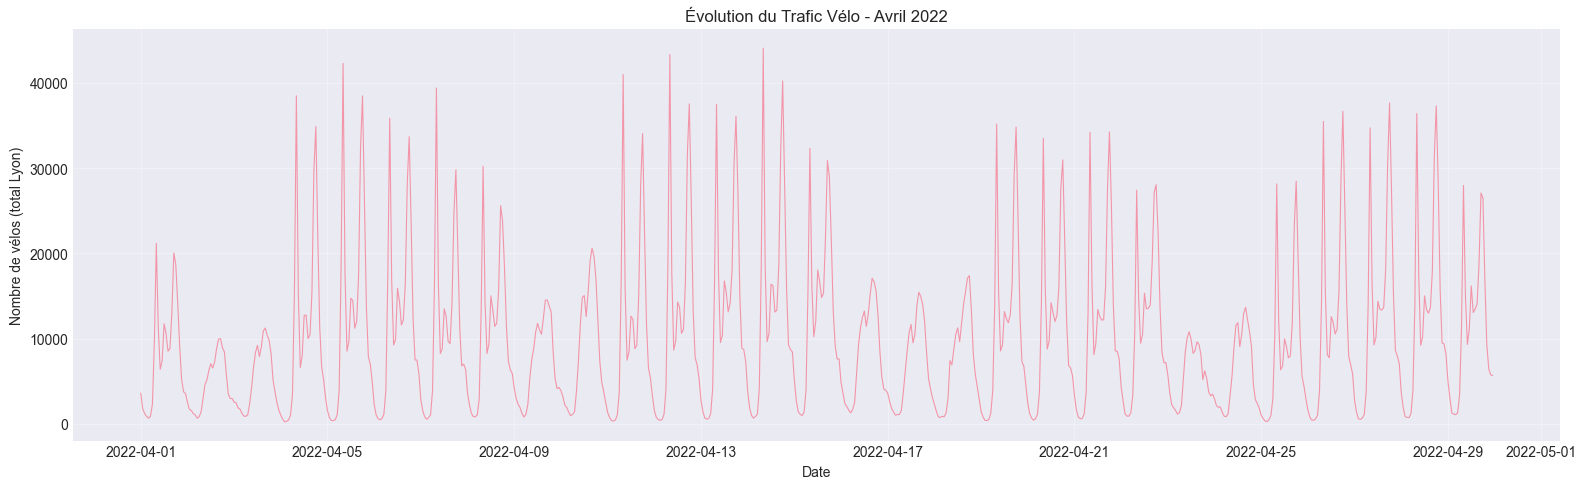

Observation : On devrait voir des patterns jour/nuit et semaine/weekend


In [21]:
# Visualisation 1 : Évolution du trafic vélo dans le temps
plt.figure(figsize=(16, 5))
plt.plot(df_merged['timestamp'], df_merged['nb_velos'], linewidth=0.8, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Nombre de vélos (total Lyon)')
plt.title('Évolution du Trafic Vélo - Avril 2022')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observation : On devrait voir des patterns jour/nuit et semaine/weekend")

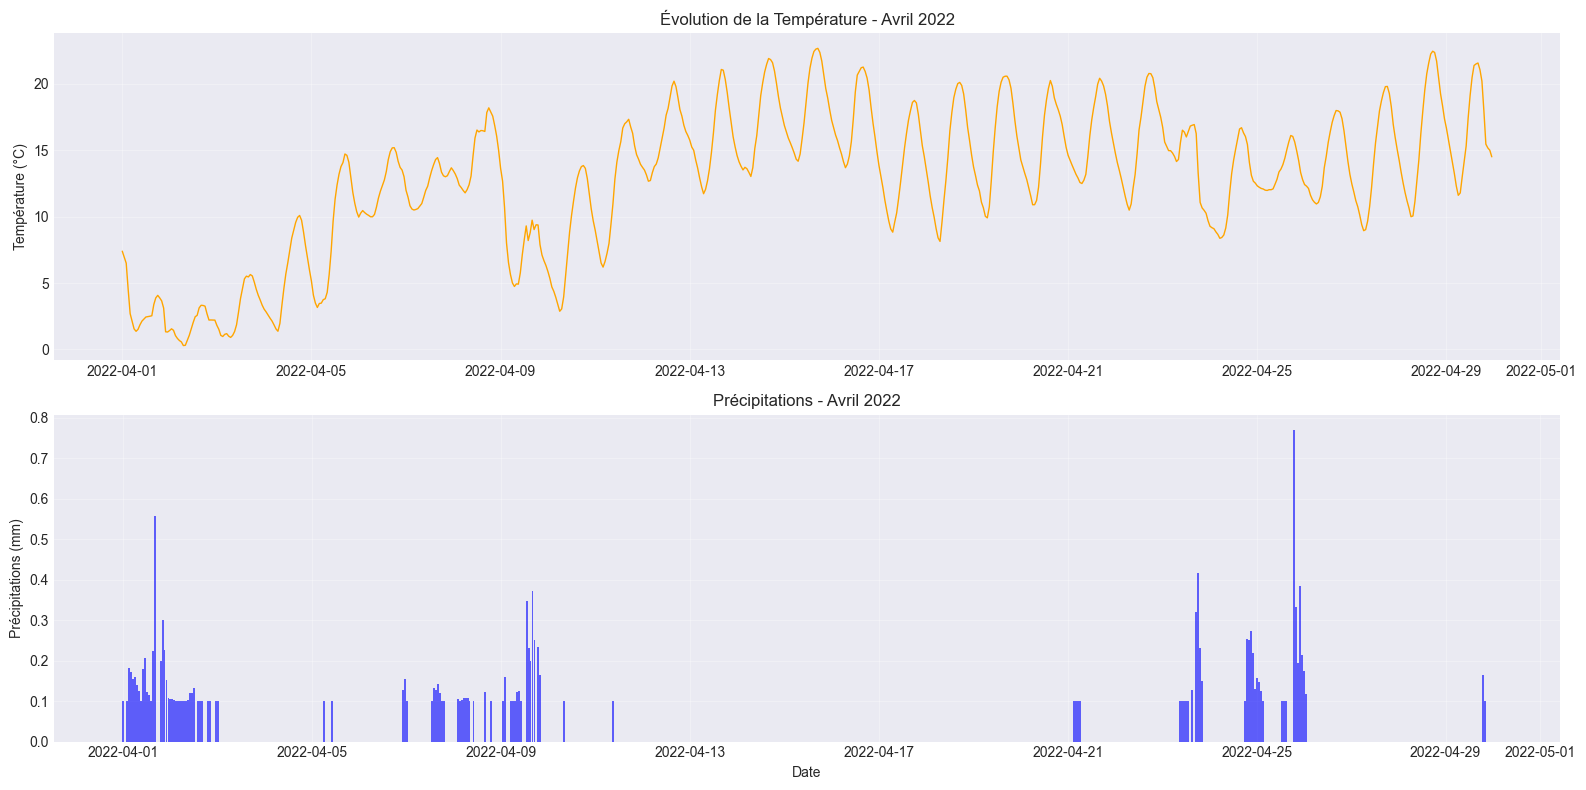

On voit bien les 16 jours de pluie identifiés précédemment


In [22]:
# Visualisation 2 : Température et Pluie
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Température
axes[0].plot(df_merged['timestamp'], df_merged['temperature'], color='orange', linewidth=1)
axes[0].set_ylabel('Température (°C)')
axes[0].set_title('Évolution de la Température - Avril 2022')
axes[0].grid(True, alpha=0.3)

# Pluie
axes[1].bar(df_merged['timestamp'], df_merged['precipitation'], width=0.04, color='blue', alpha=0.6)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Précipitations (mm)')
axes[1].set_title('Précipitations - Avril 2022')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("On voit bien les 16 jours de pluie identifiés précédemment")

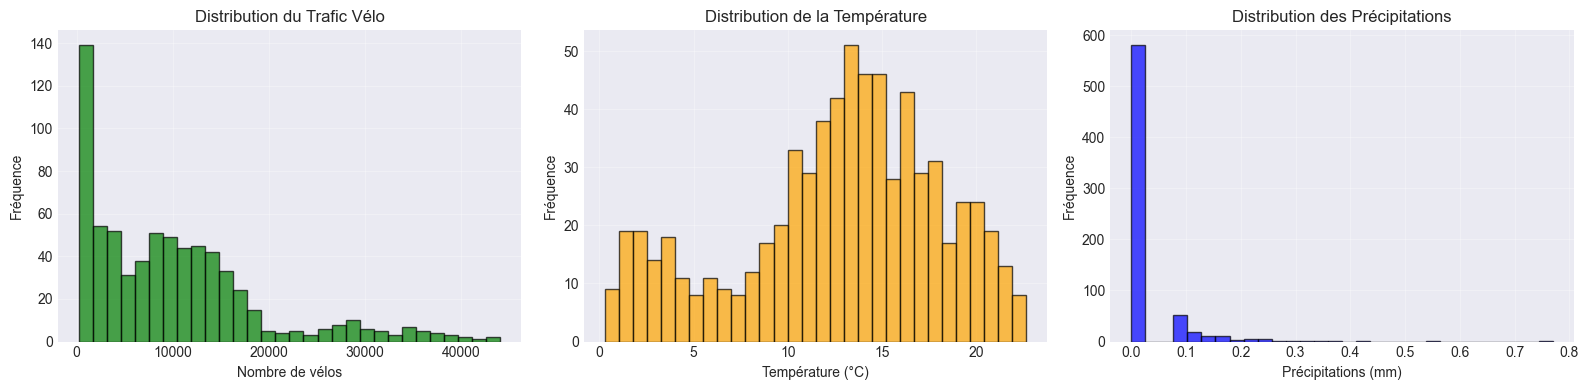

In [23]:
# Visualisation 3 : Distribution des variables
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Distribution vélos
axes[0].hist(df_merged['nb_velos'], bins=30, edgecolor='black', color='green', alpha=0.7)
axes[0].set_xlabel('Nombre de vélos')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution du Trafic Vélo')
axes[0].grid(True, alpha=0.3)

# Distribution température
axes[1].hist(df_merged['temperature'], bins=30, edgecolor='black', color='orange', alpha=0.7)
axes[1].set_xlabel('Température (°C)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution de la Température')
axes[1].grid(True, alpha=0.3)

# Distribution pluie
axes[2].hist(df_merged['precipitation'], bins=30, edgecolor='black', color='blue', alpha=0.7)
axes[2].set_xlabel('Précipitations (mm)')
axes[2].set_ylabel('Fréquence')
axes[2].set_title('Distribution des Précipitations')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

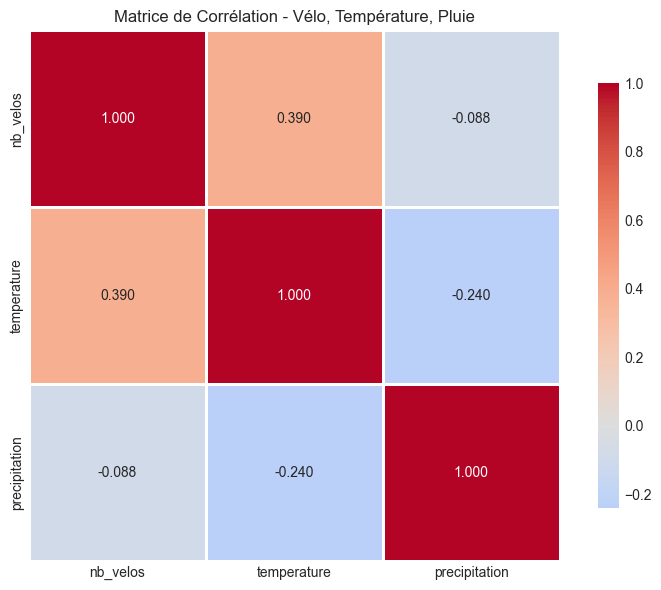


Interprétation :
Corrélation Vélo ↔ Température : 0.390
Corrélation Vélo ↔ Pluie : -0.088

Valeurs entre -1 et +1 :
  +1 = corrélation positive forte
  0 = pas de corrélation
  -1 = corrélation négative forte


In [24]:
# Visualisation 4 : Matrice de corrélation
plt.figure(figsize=(8, 6))

# Calculer la corrélation entre les variables numériques
corr_matrix = df_merged[['nb_velos', 'temperature', 'precipitation']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Vélo, Température, Pluie')
plt.tight_layout()
plt.show()

print("\nInterprétation :")
print(f"Corrélation Vélo ↔ Température : {corr_matrix.loc['nb_velos', 'temperature']:.3f}")
print(f"Corrélation Vélo ↔ Pluie : {corr_matrix.loc['nb_velos', 'precipitation']:.3f}")
print("\nValeurs entre -1 et +1 :")
print("  +1 = corrélation positive forte")
print("  0 = pas de corrélation")
print("  -1 = corrélation négative forte")

---
## 2.7 Sauvegarde du Dataset Final

In [25]:
# Sauvegarder le dataset fusionné
output_path = '../CSVs/data_merged.csv'
df_merged.to_csv(output_path, index=False, sep=';')

print("Dataset fusionné sauvegardé!")
print("="*80)
print(f"ichier : {output_path}")
print(f"Dimensions : {df_merged.shape[0]:,} lignes x {df_merged.shape[1]} colonnes")
print(f"Période : {df_merged['timestamp'].min()} → {df_merged['timestamp'].max()}")
print("\nPrêt pour l'étape 3 : Feature Engineering!")

Dataset fusionné sauvegardé!
ichier : ../CSVs/data_merged.csv
Dimensions : 696 lignes x 4 colonnes
Période : 2022-04-01 00:00:00+02:00 → 2022-04-29 23:00:00+02:00

Prêt pour l'étape 3 : Feature Engineering!


---
## 2.8 Résumé de l'Étape 2

### ✅ Ce qui a été fait :
1. **Nettoyage des formats**
   - Conversion virgule → point pour température et pluie
   - Conversion des dates en datetime

2. **Agrégation temporelle (heure)**
   - Température : Moyenne des 17 capteurs par heure
   - Pluie : Moyenne des 37 capteurs par heure
   - Vélo : Somme de tous les sites par heure

3. **Fusion avec LEFT JOIN**
   - Conservation de toutes les heures du dataset vélo
   - Ajout des données météo correspondantes

4. **Gestion des valeurs manquantes**
   - Pluie NaN → 0mm (pas de pluie)
   - Température NaN → Interpolation

5. **Visualisations exploratoires**
   - Évolution temporelle
   - Distributions
   - Corrélations

### 📊 Dataset Final :
- **Colonnes** : `timestamp`, `nb_velos`, `temperature`, `precipitation`
- **Granularité** : Horaire
- **Période** : Avril 2022 (30 jours)

### 🎯 Prochaine Étape :
**Étape 3 : Feature Engineering**
- Créer des features temporelles (heure, jour, weekend...)
- Créer des features météo enrichies
- Préparer les données pour le Machine Learning

---
**✅ Étape 2 terminée !**